<a href="https://colab.research.google.com/github/wallisonferreira/data-science-tce/blob/main/5_SOM_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando SOM para Agrupamento

Agenda:
 - Carregar o algoritmo
 - Agrupar os dados
 - Visualizar resultados

In [7]:
#lib que vamos usar
!pip install minisom

In [8]:
#bibliotecas
#modelo
from minisom import MiniSom

#utilitáios
import numpy as np
import pandas as pd

#sklean
from sklearn.preprocessing import OneHotEncoder

#Etapa 1: Dataset e Pré-processamento


In [9]:
#o arquivo CSV estará junto com o código no exemplo. Deve ser carregado na raiz do exemplo
data = pd.read_csv('ClassificacaoRisco.csv')
data

#variável target: risco
#características
# hipoteca (categorica)
# emprestimos
# idade
# estado civil (categorica)
# renda

,hipoteca,emprestimos,idade,estado_civil,renda,risco
0,y,3,34,outros,28060.70,alto
1,n,2,37,outros,28009.34,alto
2,n,2,29,outros,27614.60,alto
3,y,2,33,outros,27287.18,alto
4,y,2,39,outros,26954.06,alto
...,...,...,...,...,...,...
241,y,0,51,casado,46810.12,baixo
242,y,0,55,casado,45709.78,baixo
243,y,0,51,casado,44896.42,baixo
244,y,0,54,casado,44301.52,baixo


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['emprestimos'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['idade'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['renda'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['emprestimos'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['idade'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['renda'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['hipoteca'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['estado_civil'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_8, *['risco'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['emprestimos', 'idade'], ['idade', 'renda']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_10, *['hipoteca', 'estado_civil'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['estado_civil', 'risco'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_12, *['emprestimos', 'hipoteca'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['emprestimos', 'estado_civil'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['emprestimos', 'risco'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['idade', 'hipoteca'], **{'inner': 'stick'})
chart

In [10]:
#convertendo variáveis categóricas por one hot encoding
def preProcess(features):
  encoder = OneHotEncoder(handle_unknown='ignore')
  campos = pd.DataFrame(
      encoder.fit_transform(features).toarray()
  )
  return campos

encoded = preProcess(data[['hipoteca', 'estado_civil']])

# remove o target, que é o risco
y = preProcess(data[['risco']])
y = np.argmax(y.to_numpy(), axis=1)
data = data.join(encoded)
data

,hipoteca,emprestimos,idade,estado_civil,renda,risco,0,1,2,3,4
0,y,3,34,outros,28060.70,alto,0.0,1.0,0.0,1.0,0.0
1,n,2,37,outros,28009.34,alto,1.0,0.0,0.0,1.0,0.0
2,n,2,29,outros,27614.60,alto,1.0,0.0,0.0,1.0,0.0
3,y,2,33,outros,27287.18,alto,0.0,1.0,0.0,1.0,0.0
4,y,2,39,outros,26954.06,alto,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
241,y,0,51,casado,46810.12,baixo,0.0,1.0,1.0,0.0,0.0
242,y,0,55,casado,45709.78,baixo,0.0,1.0,1.0,0.0,0.0
243,y,0,51,casado,44896.42,baixo,0.0,1.0,1.0,0.0,0.0
244,y,0,54,casado,44301.52,baixo,0.0,1.0,1.0,0.0,0.0


In [11]:
data = data.drop(columns=['hipoteca', 'estado_civil', 'risco'])

In [12]:
data.head()

,emprestimos,idade,renda,0,1,2,3,4
0,3,34,28060.70,0.0,1.0,0.0,1.0,0.0
1,2,37,28009.34,1.0,0.0,0.0,1.0,0.0
2,2,29,27614.60,1.0,0.0,0.0,1.0,0.0
3,2,33,27287.18,0.0,1.0,0.0,1.0,0.0
4,2,39,26954.06,0.0,1.0,0.0,1.0,0.0


In [13]:
# normalização
features = data #apenas para backup
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
data

array([[ 2.00771827, -0.61079268, -0.77439451, ..., -0.68138514,
         1.82093094, -0.9067647 ],
       [ 0.82046179, -0.33492671, -0.77810162, ..., -0.68138514,
         1.82093094, -0.9067647 ],
       [ 0.82046179, -1.0705693 , -0.80659353, ..., -0.68138514,
         1.82093094, -0.9067647 ],
       ...,
       [-1.55405116,  0.95244783,  0.44078974, ...,  1.46759877,
        -0.54916965, -0.9067647 ],
       [-1.55405116,  1.2283138 ,  0.39785049, ...,  1.46759877,
        -0.54916965, -0.9067647 ],
       [-0.36679468,  1.78004575,  1.10480558, ...,  1.46759877,
        -0.54916965, -0.9067647 ]])

#Etapa 2: Treinando o clusterizador
- Usando a lib: https://github.com/JustGlowing/minisom

In [40]:
som_shape = (10, 10) #quantidade de neurônios

som = MiniSom(som_shape[0], #neurônios em X
              som_shape[1], #neurônios em Y
              data.shape[1], #tamanho do vetor de dados
              sigma=.5,
              learning_rate=2.5, #taxa de aprendizado n
              neighborhood_function='gaussian',
              activation_distance='cosine',
              random_seed=10)

som.pca_weights_init(data) #inicialização linear dos w (seeds)

#som.train_batch se quiser treinar por batches

som.train(data,
          10000, #quantidade de interações
          verbose=True,
          random_order=True #não mantém a ordem da original da base
          )

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.25022353821928095


#Etapa 3: Visualização
 - A biblioteca disponibiliza uma série de visualizações do resultado

##Visualizando a distribuição dos indivíduos pelo mapa gerado

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

markers = ['o', 's', 'D']

colors = ['C0', 'C1', 'C2']

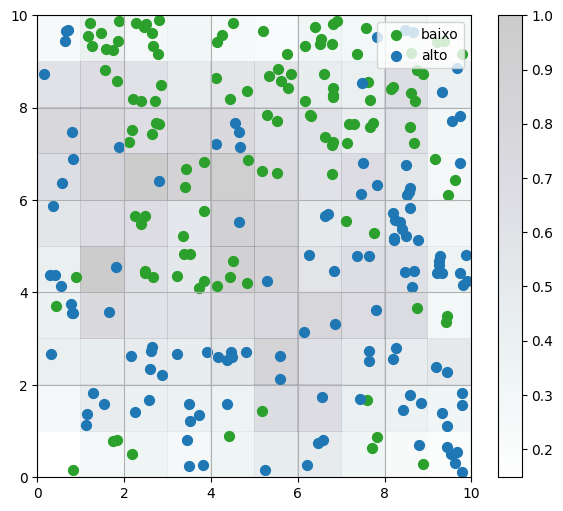

In [42]:
# para cada neurÕnio, quem são os indivíduos representados por ele
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(7, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

label_names = ['baixo', 'alto']

for c in np.unique(y):
    idx_target = y==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

##Visualizando o mapa relacionado com a classe

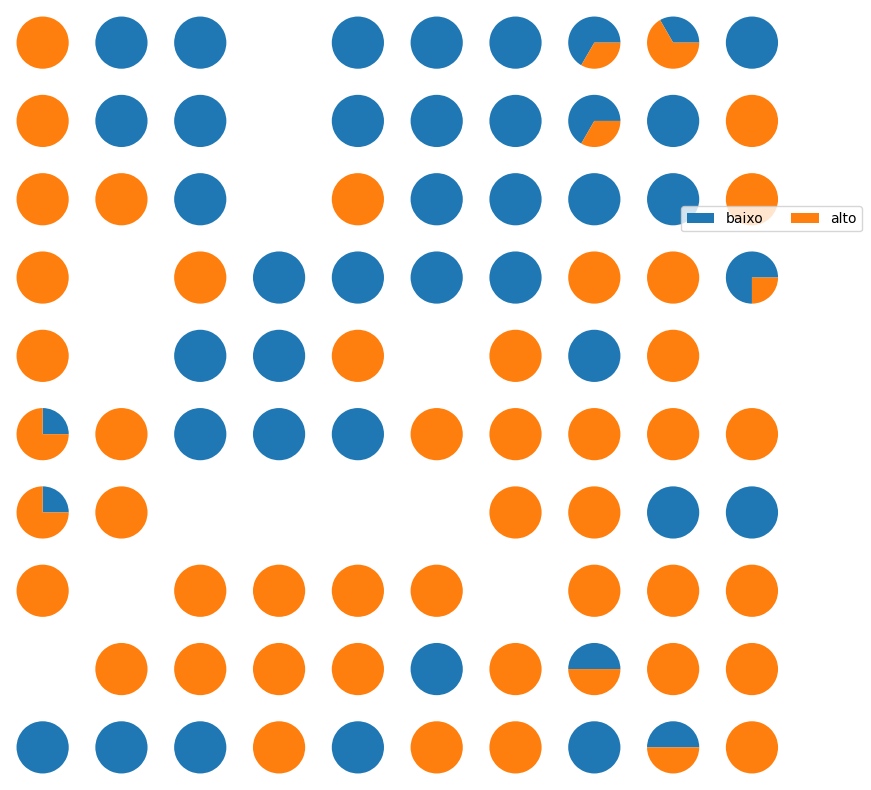

In [43]:
import matplotlib.gridspec as gridspec

label_names = ['baixo', 'alto']
labels_map = som.labels_map(data, [label_names[t] for t in y])

fig = plt.figure(figsize=(som_shape[0], som_shape[1]))
the_grid = gridspec.GridSpec(som_shape[0], som_shape[1], fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_shape[0]-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names, bbox_to_anchor=(3.5, 6.5), ncol=2)
plt.show()

#[Opcional] Análise das características

In [52]:
import seaborn as sns

<Axes: >

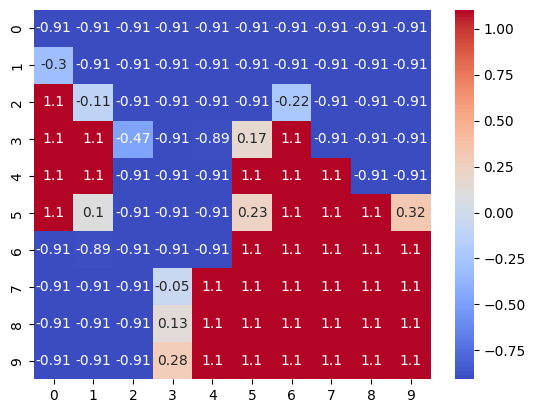

In [59]:
sns.heatmap(W[:,:,7].T, annot=True, cmap='coolwarm')

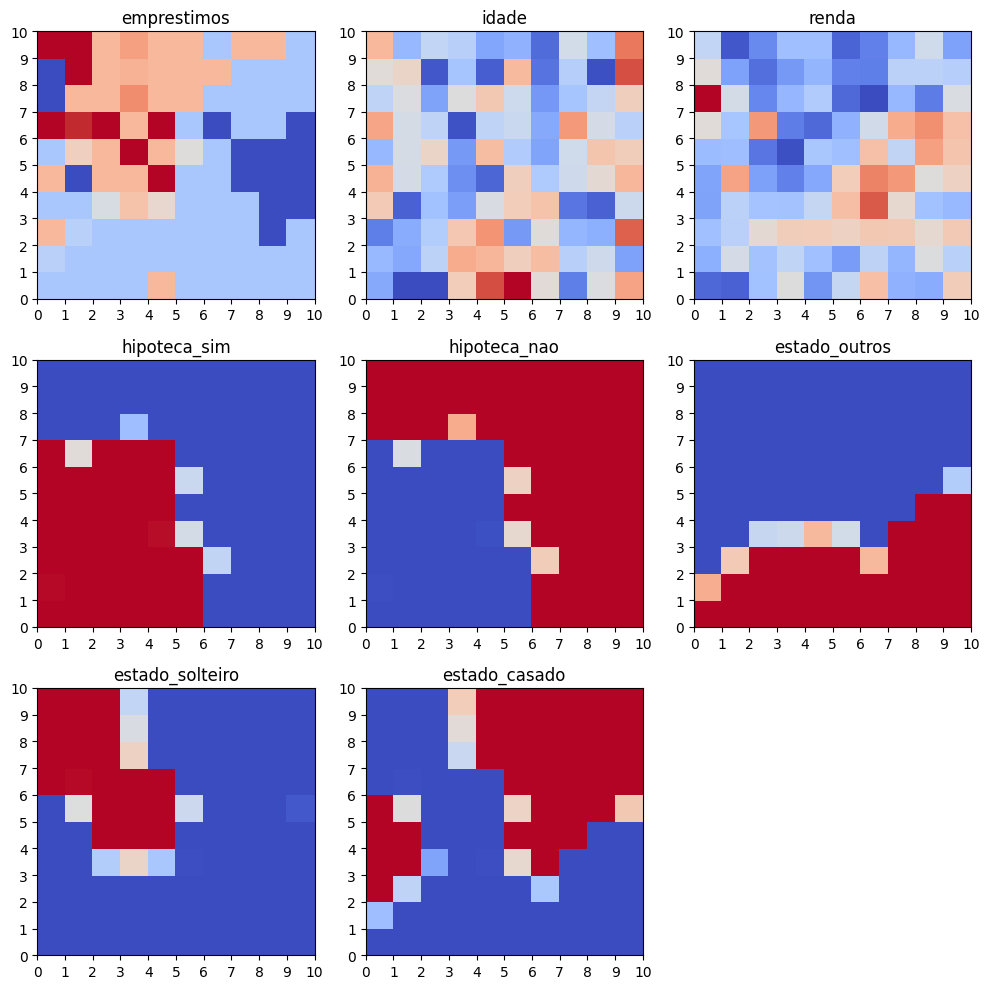

In [61]:
feature_names = ['emprestimos',	'idade',	'renda', 'hipoteca_sim', 'hipoteca_nao', 'estado_outros', 'estado_solteiro', 'estado_casado']
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(som_shape[0]+1))
    plt.yticks(np.arange(som_shape[1]+1))
plt.tight_layout()
plt.show()

['emprestimos', 'idade', 'renda', 'hipoteca_sim', 'hipoteca_nao', 'estado_outros', 'estado_solteiro', 'estado_casado']


<Axes: >

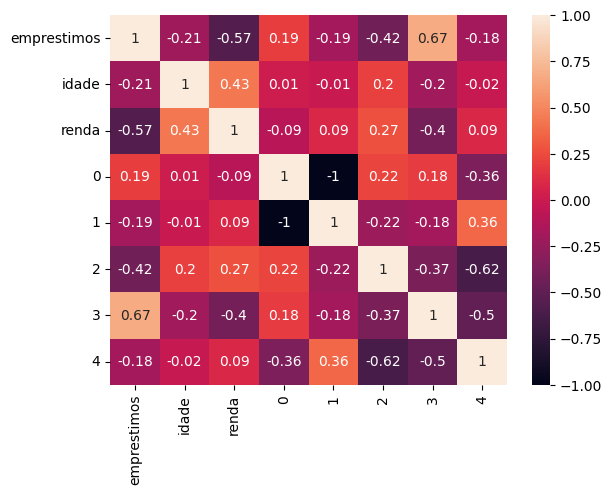

In [45]:
#alternativo: correlação entre variáveis
import seaborn as sn

feat_num = len(feature_names)

print(feature_names)

corrMatrix = features.corr().round(2)
sn.heatmap(corrMatrix, annot=True)